In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotnine import *

In [4]:
students_drop = pd.read_csv("StudentsDropout.csv", sep=';')
students_drop.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
students_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [ ]:
##Como o dataset já está quase todo pré-processado, fazemos algumas mudanças pra melhorar a visualização

dropout_analisis = students_drop.copy()
dropout_analisis["Gender"] = dropout_analisis["Gender"].map({1:'Male', 0:'Female'})
dropout_analisis["Marital status"] = dropout_analisis["Marital status"].map({1:'Single', 2:'Married', 3: "Windower", 4: "Divorced", 5: "Facto Union", 6: "Legally Separated"})
dropout_analisis["Daytime/evening attendance\t"] = dropout_analisis["Daytime/evening attendance\t"].map({0:"Evening", 1: "Daytime"})
dropout_analisis["Tuition fees up to date"] = dropout_analisis["Tuition fees up to date"].map({0:"No", 1: "Yes"})
dropout_analisis["Educational special needs"] = dropout_analisis["Educational special needs"].map({0:"No", 1: "Yes"})

## Uma Análise sobre o estado civil
---
Nessa visualização, analisamos se o estado civil do aluno influencia de alguma forma o abandono da faculdade.

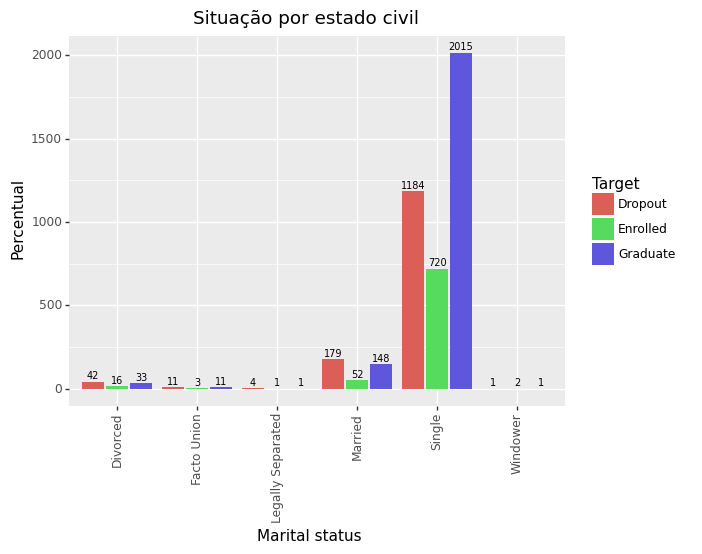

<ggplot: (8325200209389)>

In [ ]:
(ggplot(dropout_analisis)+
    aes(x='Marital status', fill='Target')+
    geom_bar(position = "dodge2")+
    labs(title="Situação por estado civil ", x="Marital status", y="Percentual")+
    geom_text(aes(label=after_stat('count'), y=stage(after_stat='count', after_scale='y + 35')), stat='count', position = position_dodge2(width=0.9), size=7)+
    theme(axis_text_x=element_text(angle=90))
)


In [ ]:
stu_mtsts = dropout_analisis.groupby(['Marital status'])['Target'].value_counts().rename('Count').reset_index()
stu_mtsts

,Marital status,Target,Count
0,Divorced,Dropout,42
1,Divorced,Graduate,33
2,Divorced,Enrolled,16
3,Facto Union,Dropout,11
4,Facto Union,Graduate,11
5,Facto Union,Enrolled,3
6,Legally Separated,Dropout,4
7,Legally Separated,Enrolled,1
8,Legally Separated,Graduate,1
9,Married,Dropout,179


In [ ]:
px.bar(stu_mtsts, x='Marital status', y='Count', color='Target')

## Análise sobre o gênero
---
Agora, analisamos o comportamento por gênero.

In [ ]:
## no dataset há quase o dobro de registro de mulheres
dropout_analisis['Gender'].value_counts()

Female    2868
Male      1556
Name: Gender, dtype: int64

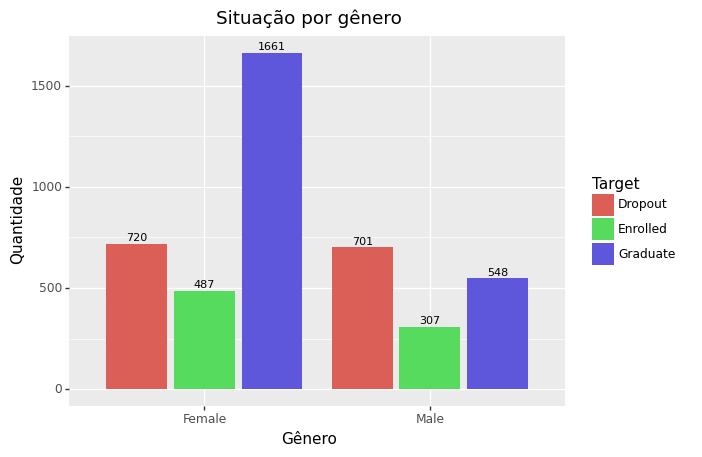

<ggplot: (8325121335651)>

In [ ]:
(ggplot(dropout_analisis)+
    aes(x='Gender', fill='Target')+
    geom_bar(position = "dodge2")+
    labs(title="Situação por gênero", x="Gênero", y="Quantidade")+
    geom_text(aes(label=after_stat('count'), y=stage(after_stat='count', after_scale='y + 30')), stat='count', position = position_dodge2(width=0.9), size=8)
 )

Analisando a proporção por gênero, observamos que: Os homens abandonam mais.

---



## Análise sobre inadimplencia
---
Analisamos aqui, se as mensalidades em atraso são fatores que explicam o abandono.

In [ ]:
fees = dropout_analisis.groupby(['Tuition fees up to date', 'Gender'])['Target'].value_counts().rename('Count').reset_index()
px.bar(fees, x='Tuition fees up to date', hover_data=['Gender'], y='Count', color='Target', text_auto=True, barmode="group", facet_col="Gender")

Quando não devem, os homens ainda abandonam mais. Mas o comportamento é parecido com os das mulheres quando tem mensalidades em atraso.

## Análise sobre estudantes com necessidades educacionais especiais
---

In [ ]:
special_needs = dropout_analisis.groupby(['Educational special needs', 'Gender'])['Target'].value_counts().rename('Count').reset_index()
special_needs

,Educational special needs,Gender,Target,Count
0,No,Female,Graduate,1641
1,No,Female,Dropout,712
2,No,Female,Enrolled,478
3,No,Male,Dropout,692
4,No,Male,Graduate,545
5,No,Male,Enrolled,305
6,Yes,Female,Graduate,20
7,Yes,Female,Enrolled,9
8,Yes,Female,Dropout,8
9,Yes,Male,Dropout,9


In [ ]:
px.bar(special_needs, x='Educational special needs', y='Count', color='Target', barmode="group", text_auto=True, facet_col="Gender")

Como o dataset apresenta poucos registros de alunos com necessidades educacionais especiais, o comportamento por gênero permanece como as análises anteriores. E mesmo quando há uma necessidade especial, as mulheres ainda se graduam mais do que abandonam.


## Análise por período do curso
---
Verificamos se o período em que o aluno estuda é um fator determinante ao abandono.



In [ ]:
stu_periodo = dropout_analisis.groupby(["Daytime/evening attendance\t"])['Target'].value_counts().rename('Count').reset_index()
stu_periodo

,Daytime/evening attendance\t,Target,Count
0,Daytime,Graduate,2008
1,Daytime,Dropout,1214
2,Daytime,Enrolled,719
3,Evening,Dropout,207
4,Evening,Graduate,201
5,Evening,Enrolled,75


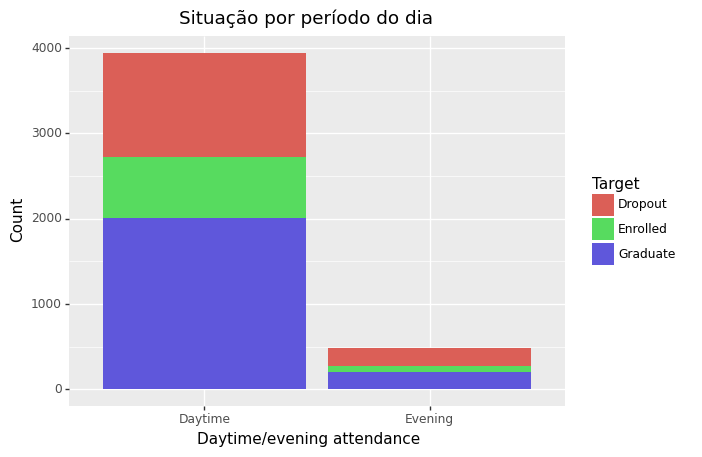

<ggplot: (8325121237905)>

In [ ]:
(ggplot(dropout_analisis)+
    aes(x='Daytime/evening attendance\t', fill='Target')+
    geom_bar()+
    labs(title="Situação por período do dia ", x="Daytime/evening attendance", y="Count")
)

No período do dia, graduam-se mais alunos, enquanto na noite há uma quantidade quase que igual entre abandonos e graduados.

In [ ]:
px.bar(stu_periodo, x='Daytime/evening attendance\t', y='Count', color='Target')

In [ ]:
len(dropout_analisis.Course.unique())

17

In [ ]:
## Nursing é o curso que mais ocorre nos dados
students_drop.Course.mode()

0    9500
Name: Course, dtype: int64

In [ ]:
dropout_analisis.Course.value_counts()

9500    766
9147    380
9238    355
9085    337
9773    331
9670    268
9991    268
9254    252
9070    226
171     215
8014    215
9003    210
9853    192
9119    170
9130    141
9556     86
33       12
Name: Course, dtype: int64

In [ ]:
dropout_analisis.Nacionality.value_counts()

1      4314
41       38
26       14
22       13
6        13
24        5
100       3
11        3
103       3
21        2
101       2
62        2
25        2
2         2
105       2
32        1
13        1
109       1
108       1
14        1
17        1
Name: Nacionality, dtype: int64

In [ ]:
dropout_analisis.Nacionality.mode()

0    1
Name: Nacionality, dtype: int64

In [ ]:
stu_order = dropout_analisis.groupby(['Application order'])['Target'].value_counts().rename('Count').reset_index()
stu_order

,Application order,Target,Count
0,0,Graduate,1
1,1,Graduate,1408
2,1,Dropout,1053
3,1,Enrolled,565
4,2,Graduate,301
5,2,Dropout,150
6,2,Enrolled,96
7,3,Graduate,173
8,3,Dropout,76
9,3,Enrolled,60


In [ ]:
## Média de idade de ingresso
students_drop['Age at enrollment'].mean()

23.265144665461122

## Pré-processamento
---

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.get_dummies(students_drop['Target'])
df

,Dropout,Enrolled,Graduate
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
...,...,...,...
4419,0,0,1
4420,1,0,0
4421,1,0,0
4422,0,0,1


In [ ]:
le = LabelEncoder()
students_drop['Target'] = le.fit_transform(students_drop['Target'])

In [ ]:
students_drop.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2
